# Passenger-Seating Project - Air France

## 0. Import Libraries

In [1]:
from passengers import *
from planes import *
from constraints import *
from main import *
from evaluation import *
from final_heuristic import *

## 1. Set Hyperparameters

In [2]:
# Time limit for the solver 
TIME_LIMIT = 300

# Importance factor for passenger corresponding times
ALPHA = 0.1

# Save the results in csv file
SAVE = True

#Plot the difference before and after the heuristics
PLOT = False

# Paths for inputs and results
PATH_FOR_INPUTS = "data/"
PATH_FOR_RESULTS = f"results{TIME_LIMIT}/"

## 2. Choose inputs

In [21]:
dates = ["2nov", "5nov","7nov", "21oct", "22oct", "23oct", "24oct", "26oct", "30oct",]

## 3. Launch solver

In [ ]:
for date in dates:
    print(f"\n\n\n{date}\n\n\n")
    path = f'{PATH_FOR_INPUTS}{date}.csv'
    try :
        passengers, plane, passengers_on_seats, barycenter = computer_passenger_seating(path, time_limit=TIME_LIMIT, alpha=ALPHA, callback=True, name=date, path_for_results=PATH_FOR_RESULTS, save=SAVE, plot=PLOT)
    except:
        print("\n\n\nERROR : NO SOLUTIONS -> SOFT CONSTRAINTS\n\n\n")
        try :
            passengers, plane, passengers_on_seats, barycenter = computer_soft_passenger_seating(path, time_limit=TIME_LIMIT, alpha=ALPHA, callback=True, name=date, path_for_results=PATH_FOR_RESULTS, save=SAVE, plot=PLOT)
        except:
            print("\n\n\nERROR : NO SOLUTIONS AT ALL\n\n\n")

## 4. Plot results

2nov
Respecting constraints ? :  No

Best solver metric :  2275.9882352941177
Actual solver metric :  4646.261764705882

Best original metric :  171.01176470588234
Actual original metric :  155.73823529411766


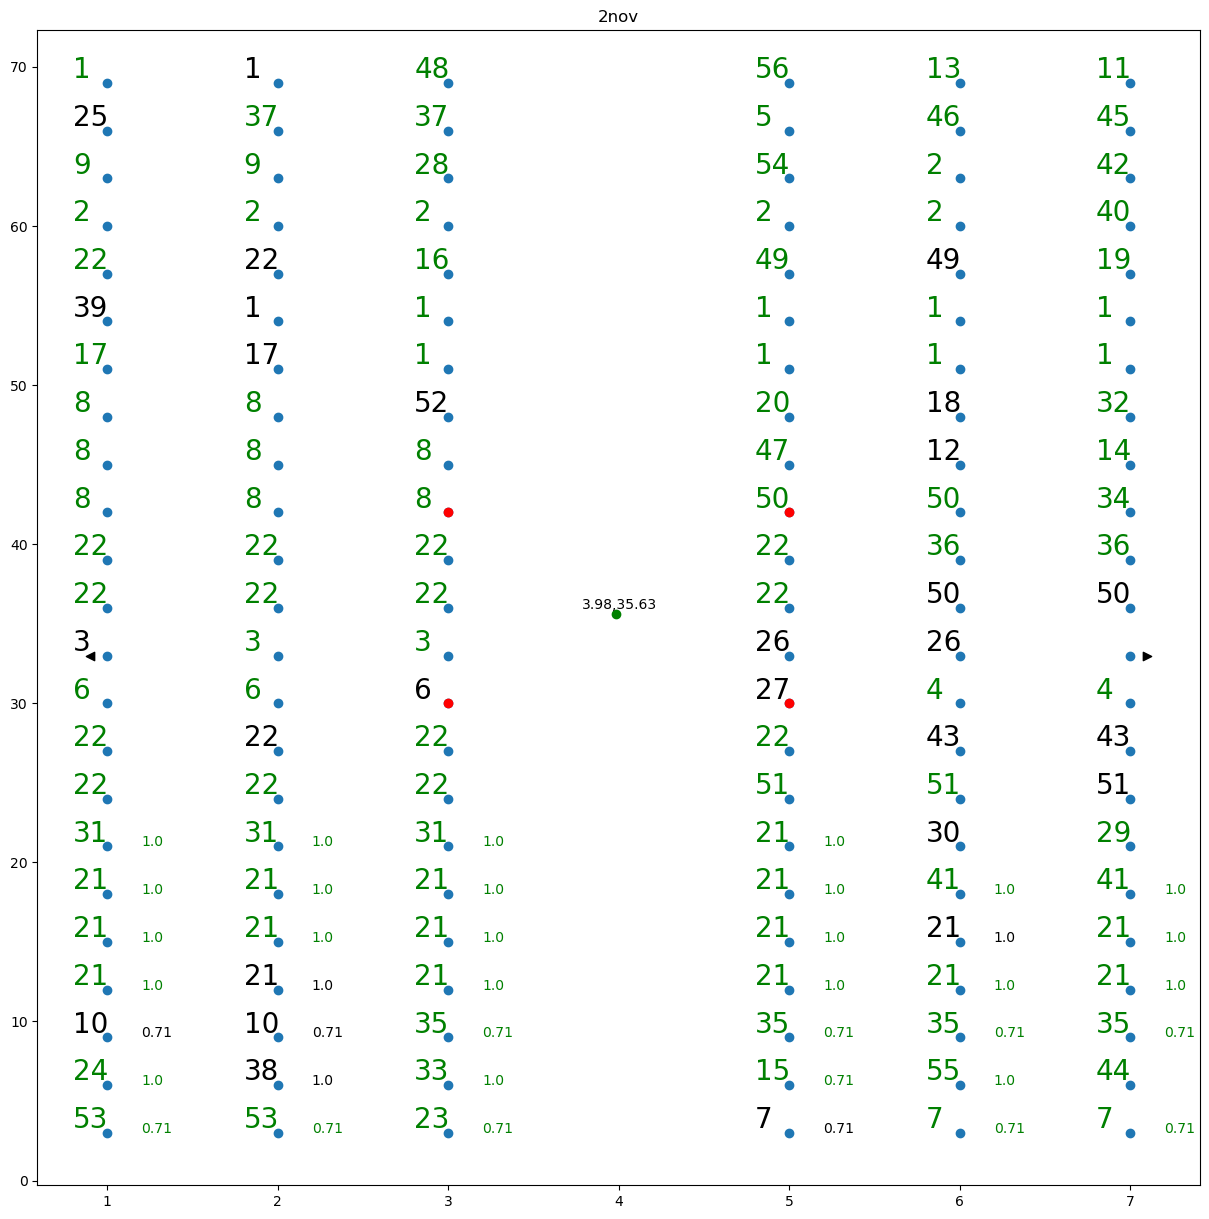

5nov
Respecting constraints ? :  Yes

Best solver metric :  116.92575757575757
Actual solver metric :  177.98636363636365

Best original metric :  81.07424242424243
Actual original metric :  69.01363636363637


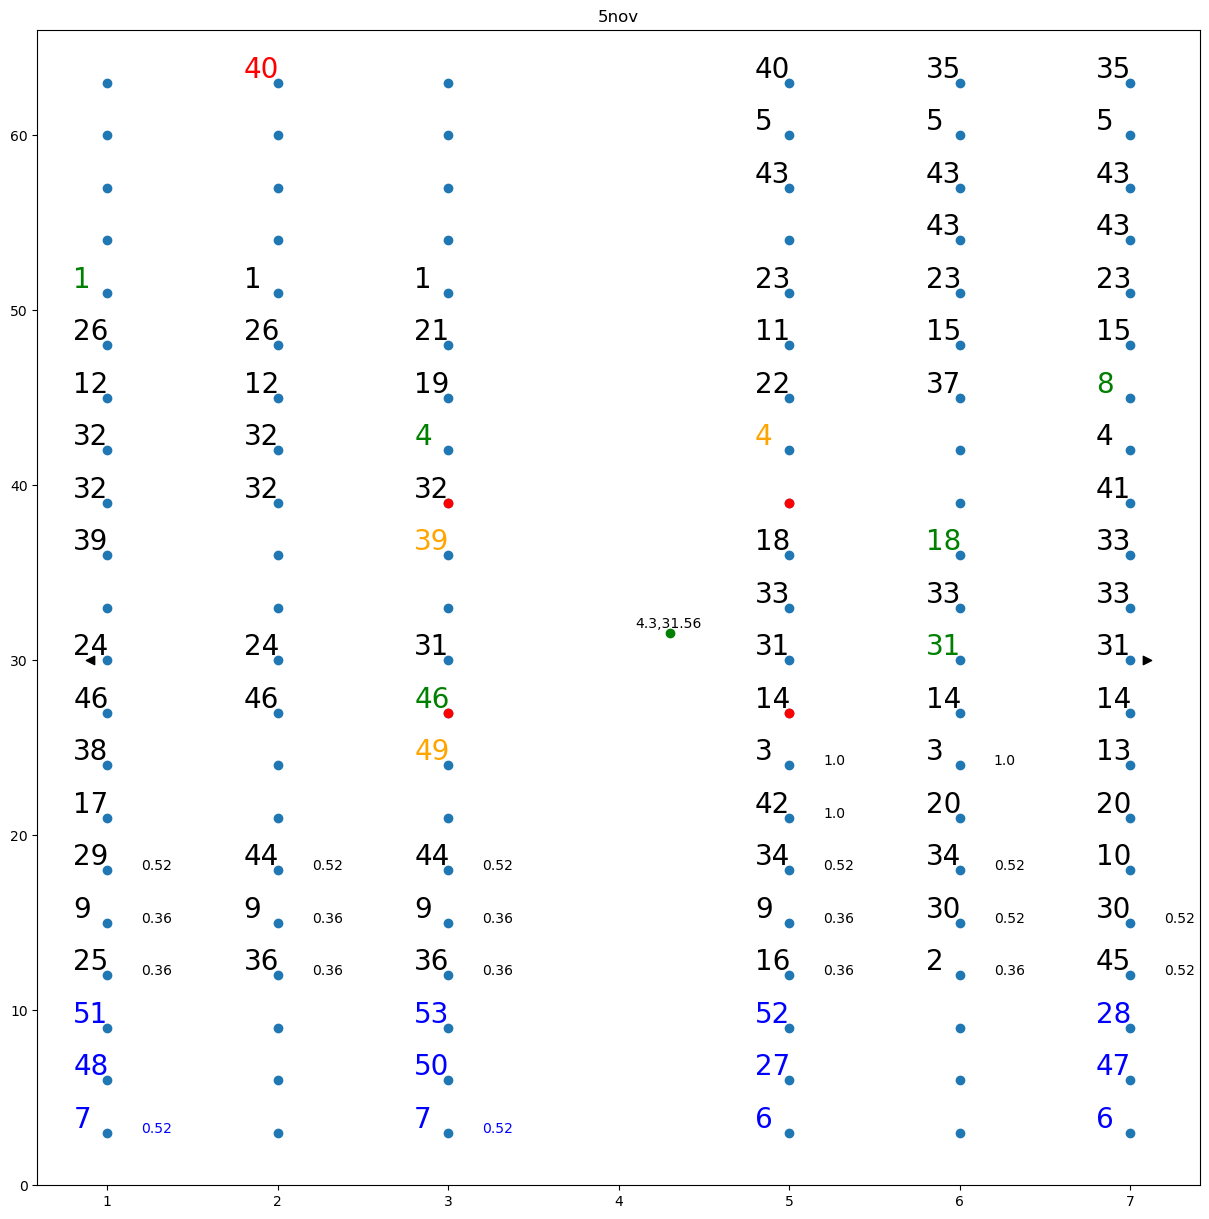

7nov
Respecting constraints ? :  No

Best solver metric :  232.27592592592595
Actual solver metric :  769.4837962962963

Best original metric :  102.72407407407407
Actual original metric :  63.5162037037037


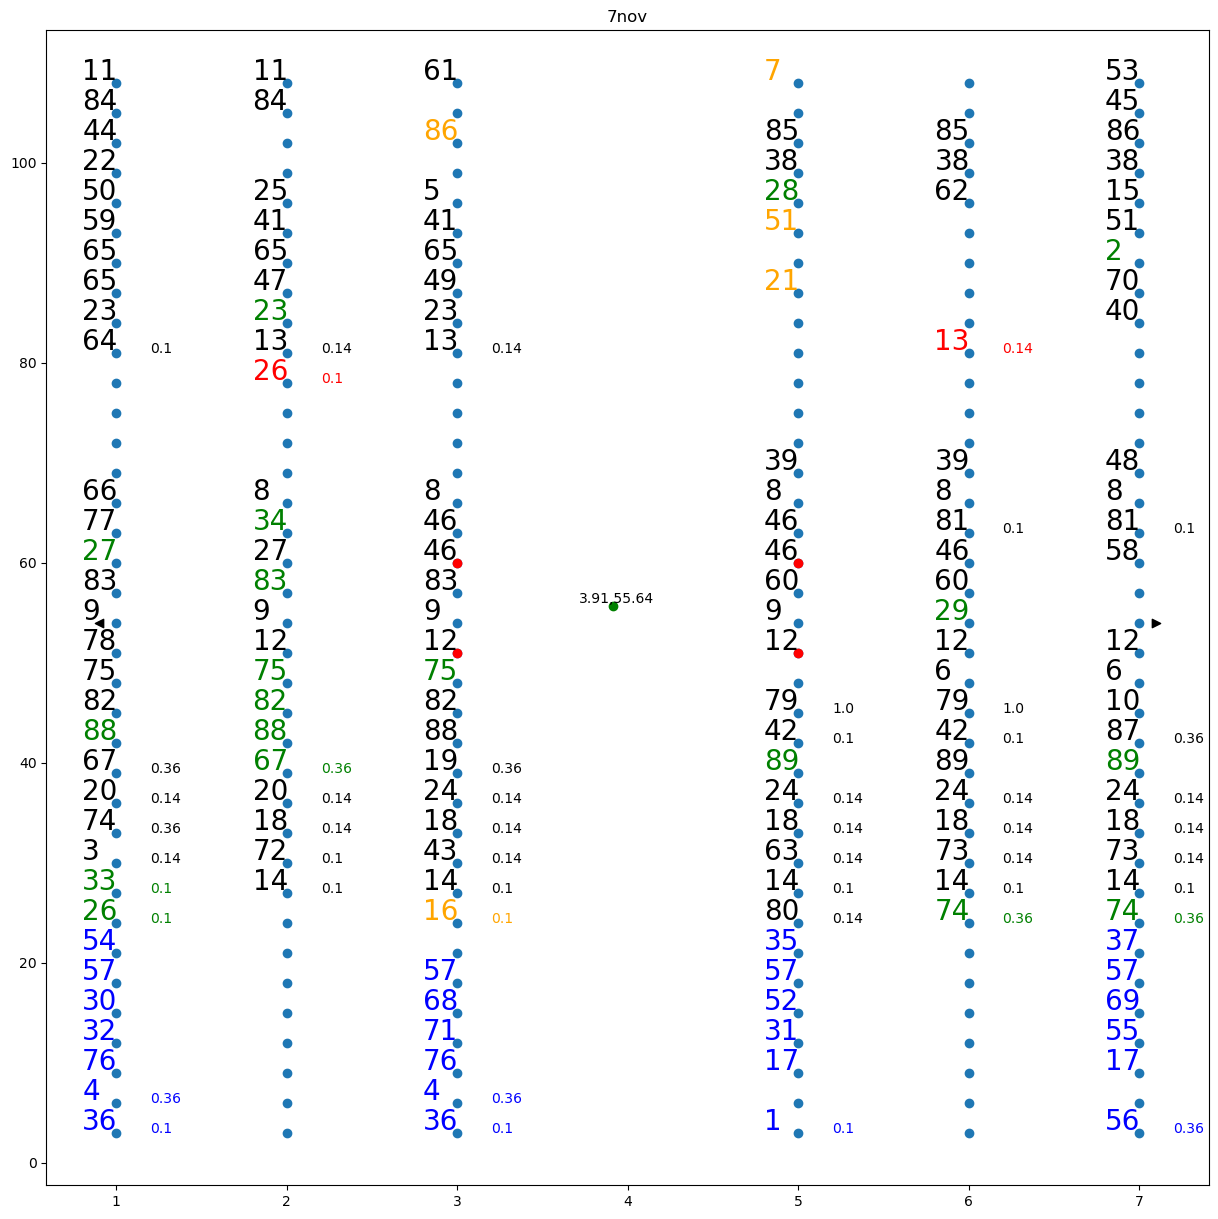

21oct
Respecting constraints ? :  Yes

Best solver metric :  115.16944444444444
Actual solver metric :  115.17430555555555

Best original metric :  25.830555555555563
Actual original metric :  25.82569444444445


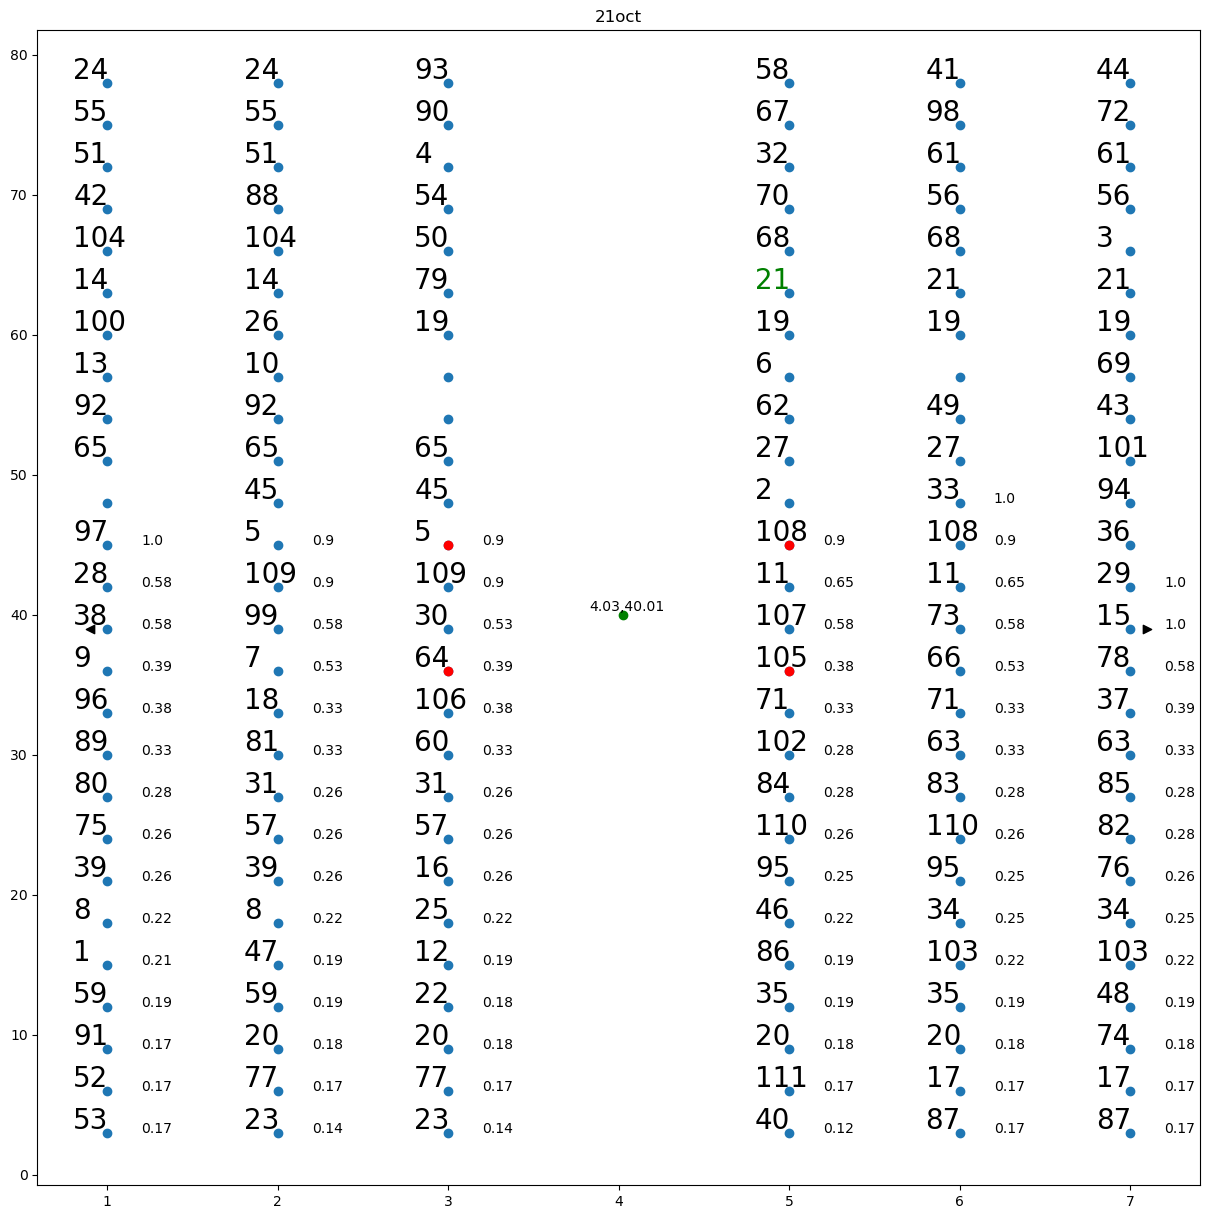

22oct
Respecting constraints ? :  Yes

Best solver metric :  55.427522935779805
Actual solver metric :  55.42752293577982

Best original metric :  16.572477064220195
Actual original metric :  16.57247706422018


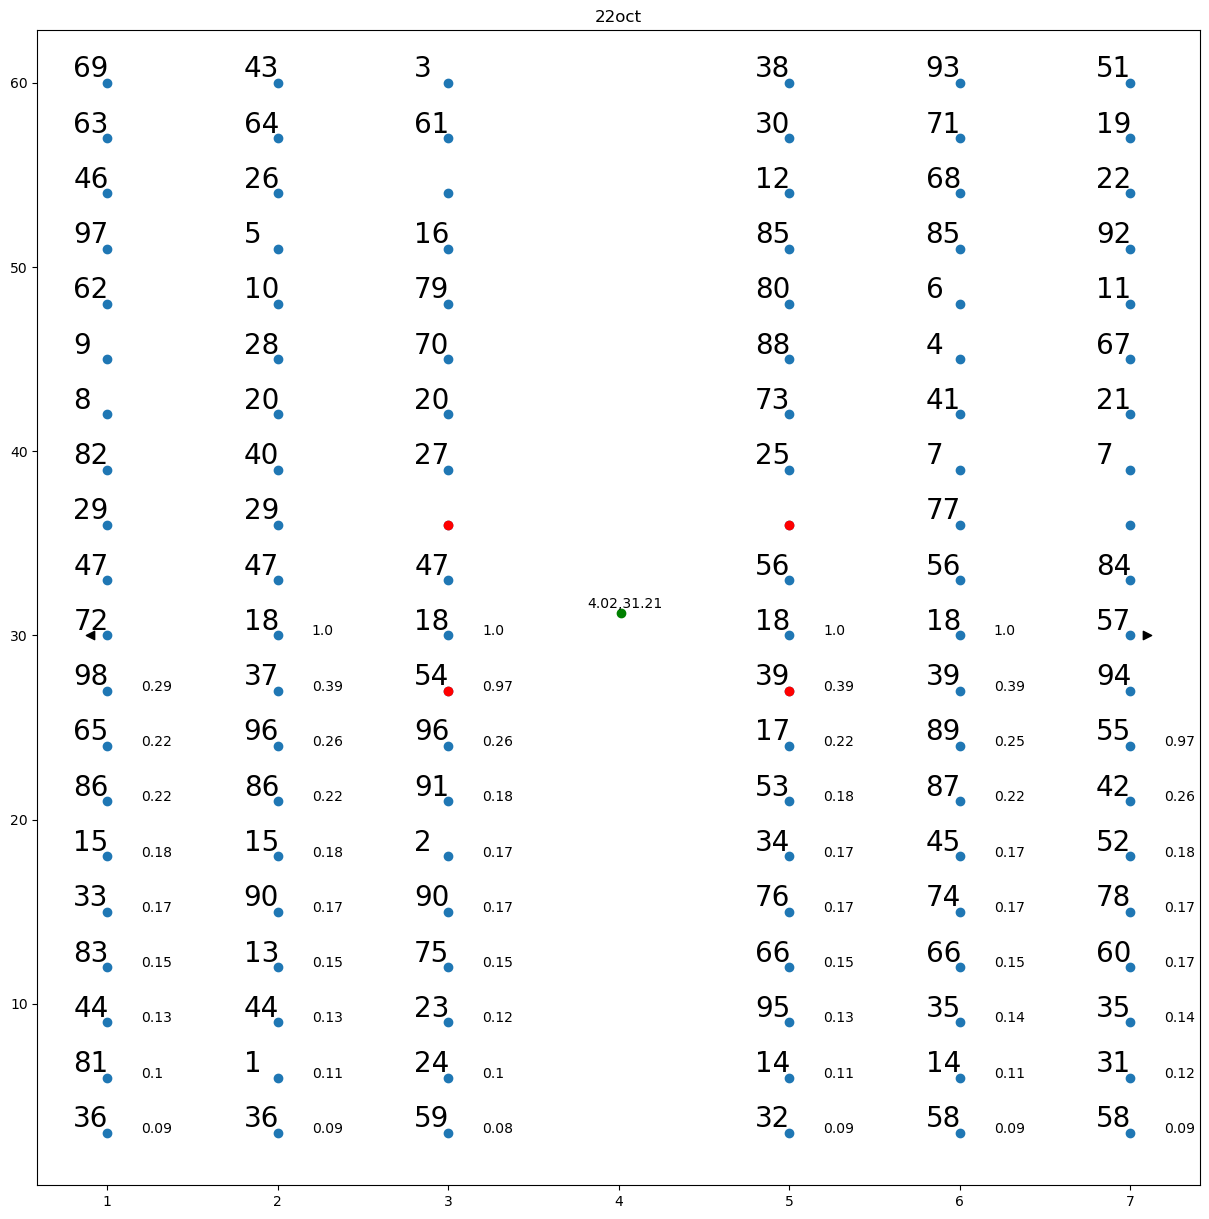

23oct
Respecting constraints ? :  Yes

Best solver metric :  1416.616923076923
Actual solver metric :  1732.5323076923078

Best original metric :  -0.6169230769230154
Actual original metric :  -15.532307692307725


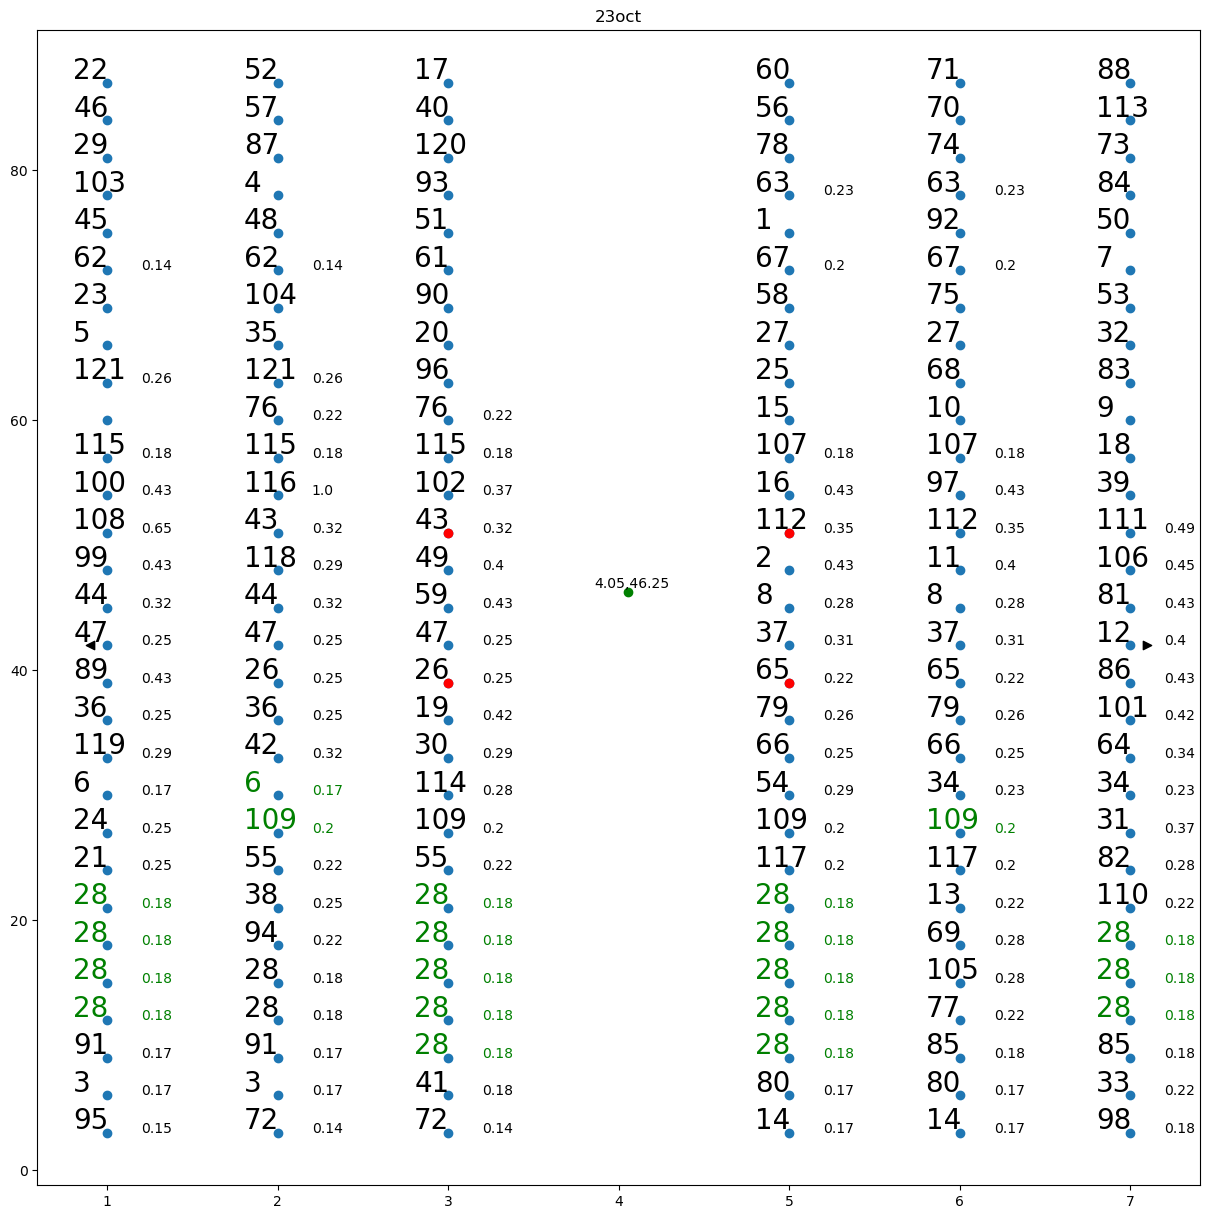

24oct
Respecting constraints ? :  Yes

Best solver metric :  1151.988202247191
Actual solver metric :  1274.9932584269663

Best original metric :  119.01179775280899
Actual original metric :  114.00674157303371


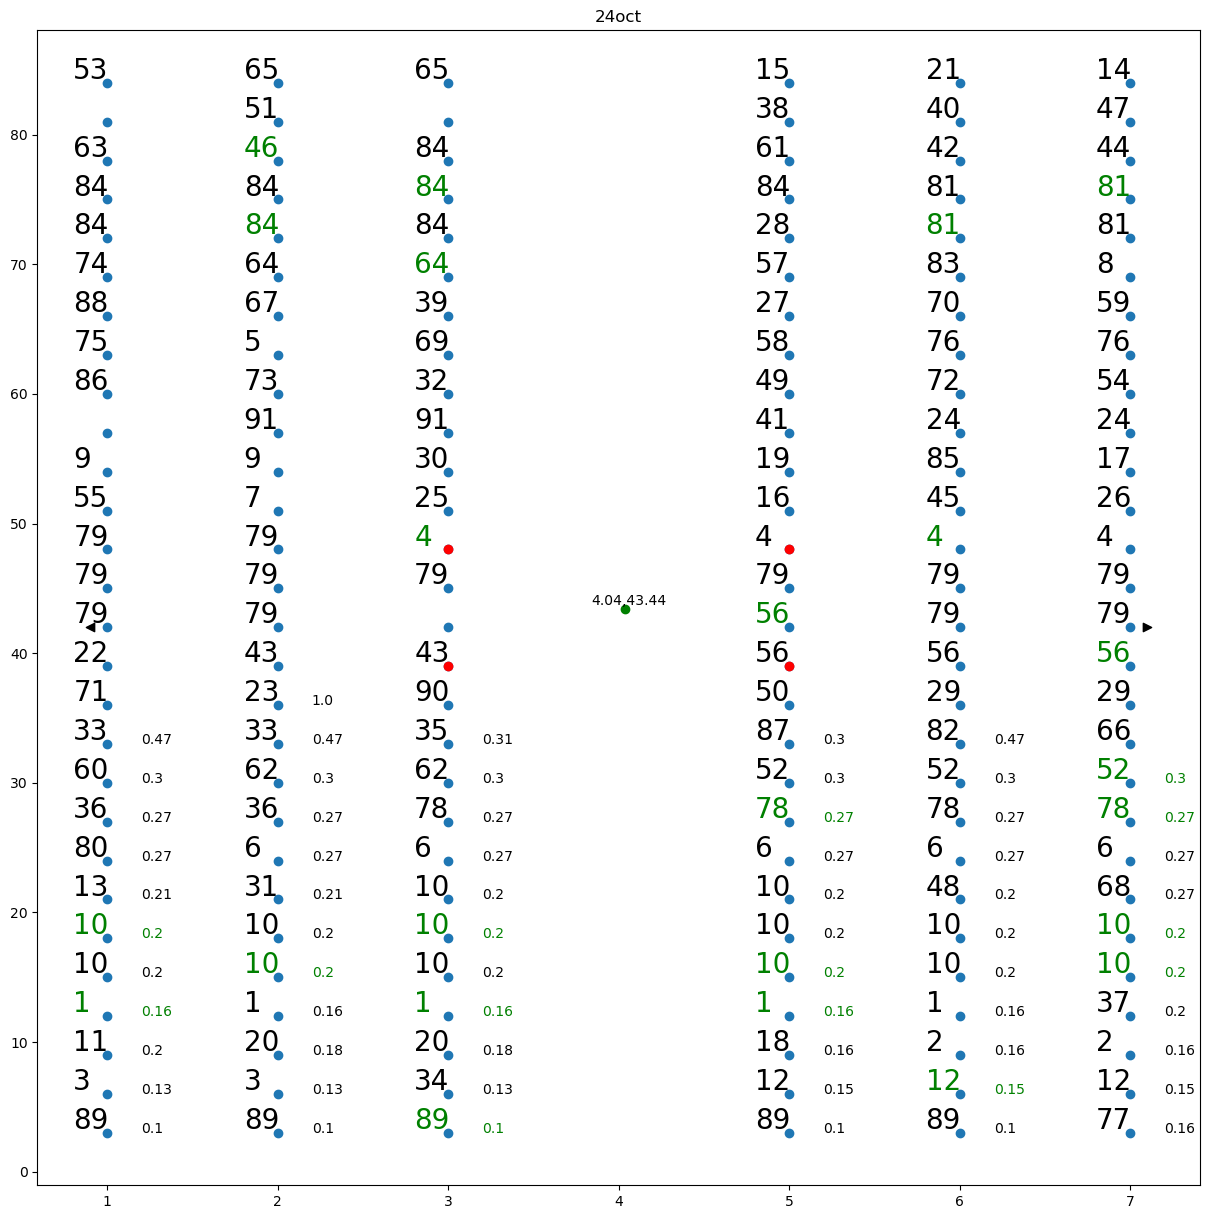

26oct
Respecting constraints ? :  No

Best solver metric :  593.2860215053763
Actual solver metric :  638.1005376344086

Best original metric :  122.71397849462366
Actual original metric :  108.89946236559139


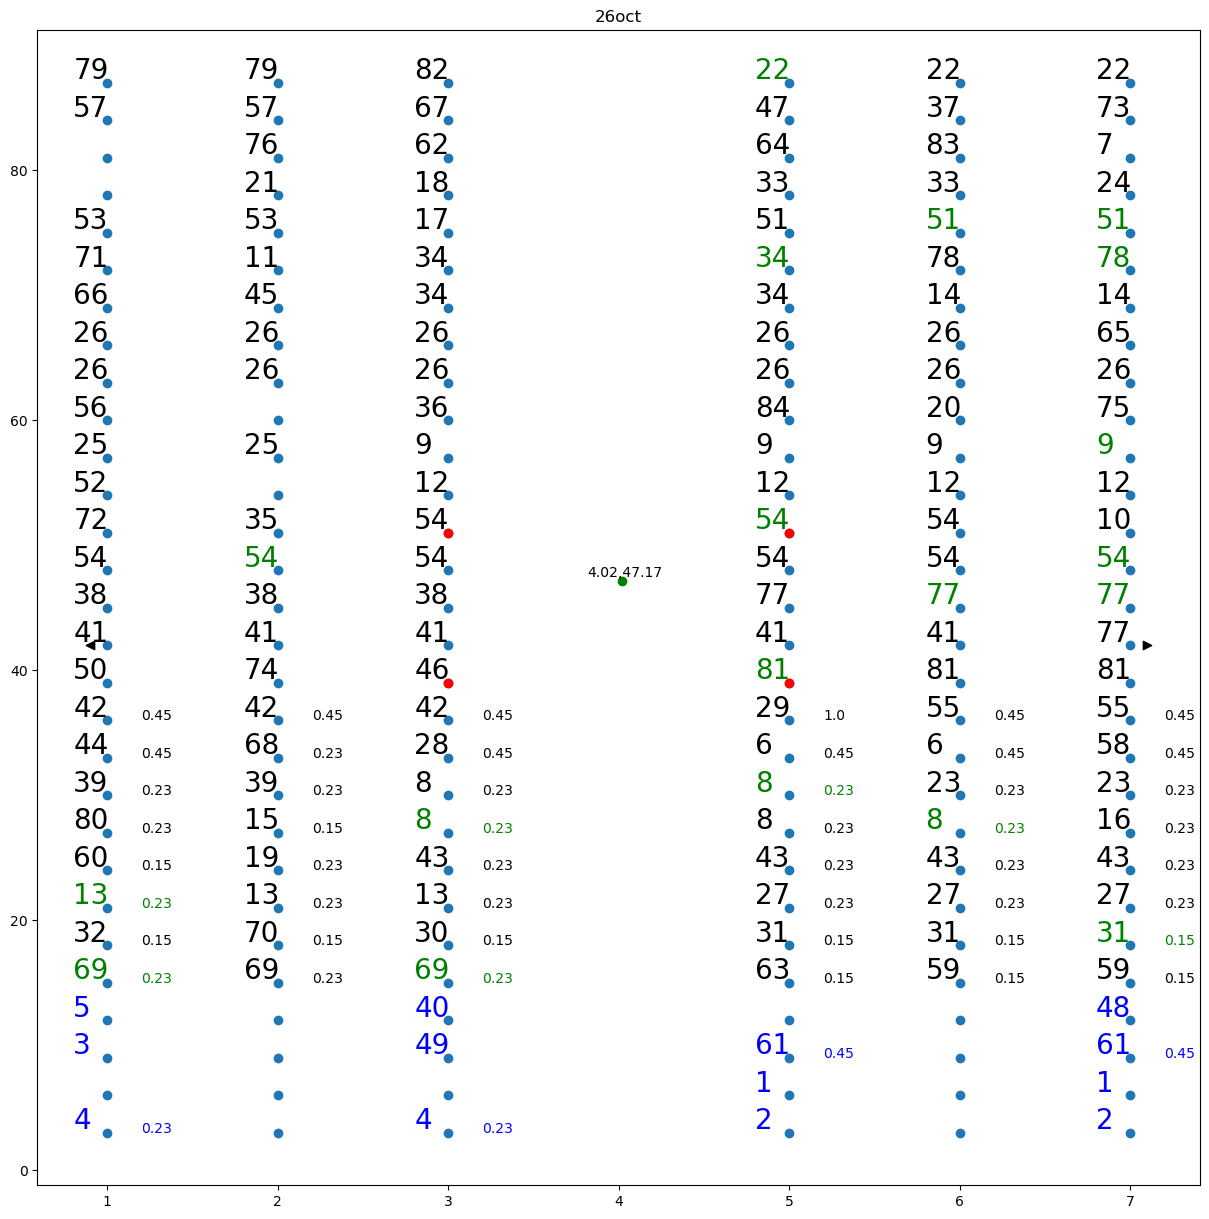

30oct
Respecting constraints ? :  Yes

Best solver metric :  82.60980392156863
Actual solver metric :  133.88529411764705

Best original metric :  62.39019607843137
Actual original metric :  54.11470588235294


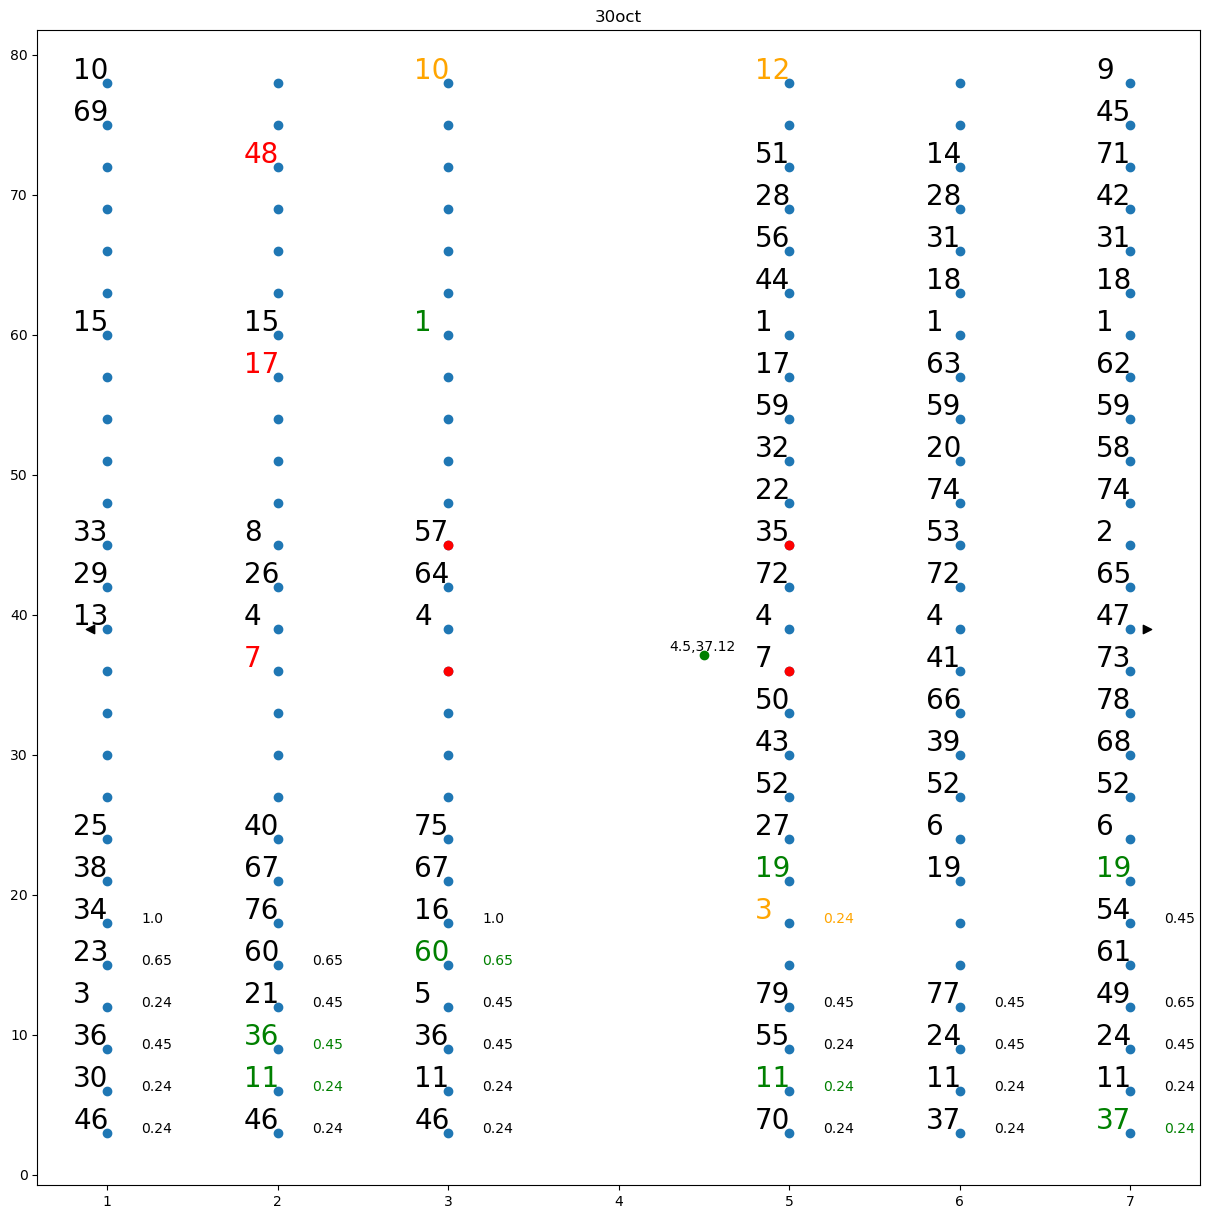

In [17]:
for date in dates:
    passengers_path = f'{PATH_FOR_INPUTS}{date}.csv'
    results_path = f'{PATH_FOR_RESULTS}{date}.csv'

    plane = get_plane_from_results(results_path)
    passengers = Passengers.compute_passengers_sets(passengers_path)
    passengers_on_seats, barycenter = get_passengers_on_seats_from_results(results_path)
    print(date)
    print("Respecting constraints ? : ", "Yes" if check_constraints(plane, passengers, passengers_on_seats) != None else "No")
    print()
    print("Best solver metric : ", best_metric(passengers, alpha=ALPHA))
    print("Actual solver metric : ", evaluate_metric(plane, passengers, passengers_on_seats, alpha=ALPHA))
    print()
    print("Best original metric : ", best_original_metric(passengers, alpha=ALPHA))
    print("Actual original metric : ", evaluate_original_metric(plane, passengers, passengers_on_seats, alpha=ALPHA))
    plot_results(passengers_path, results_path, title=date)

## 5. Statistics

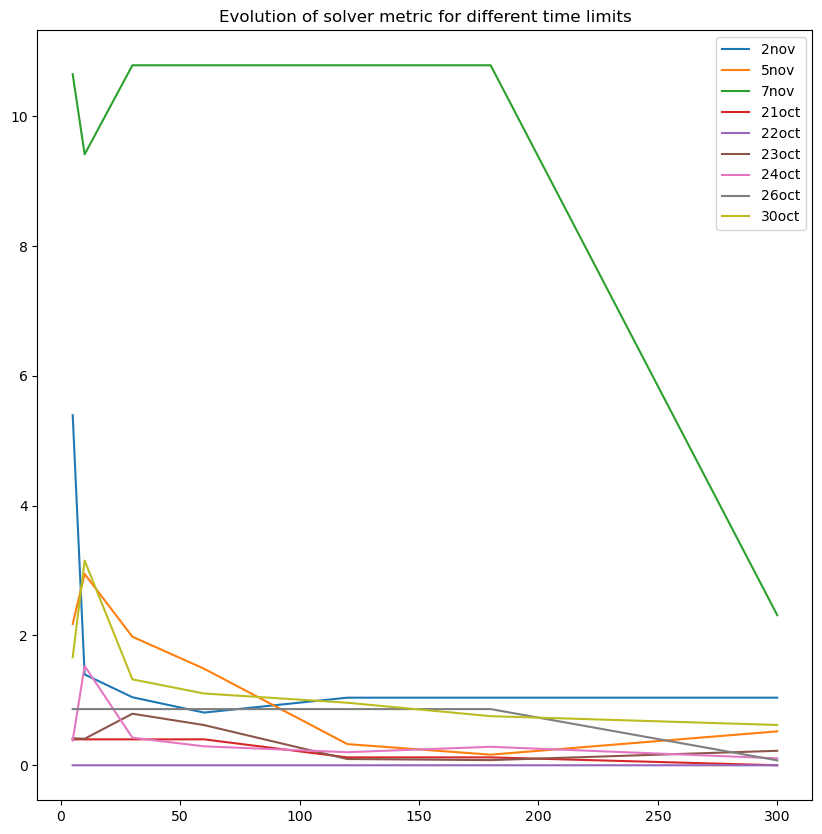

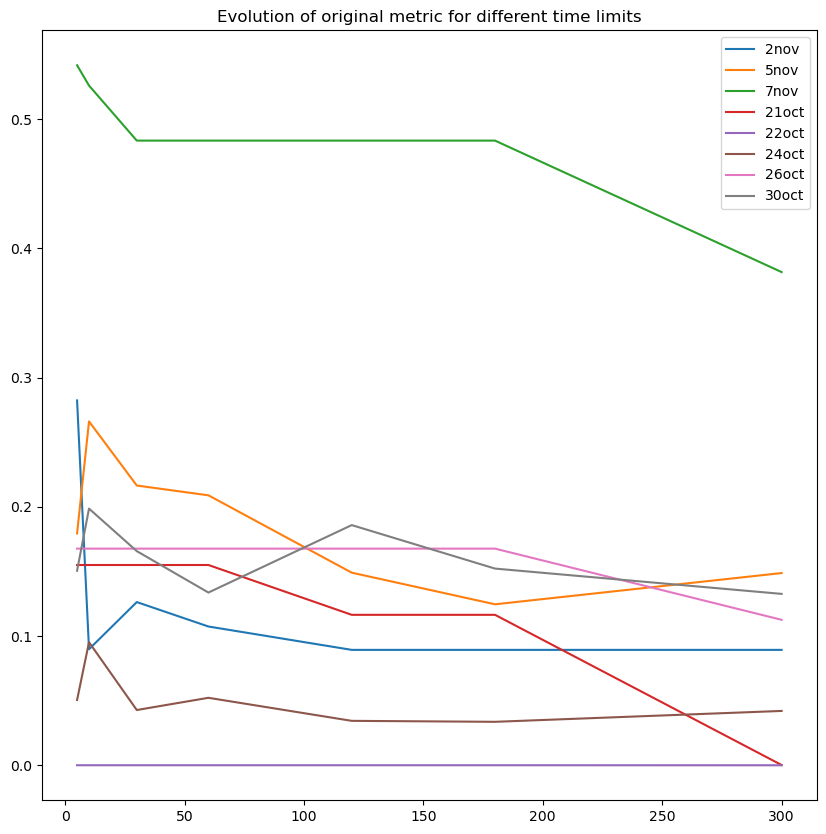

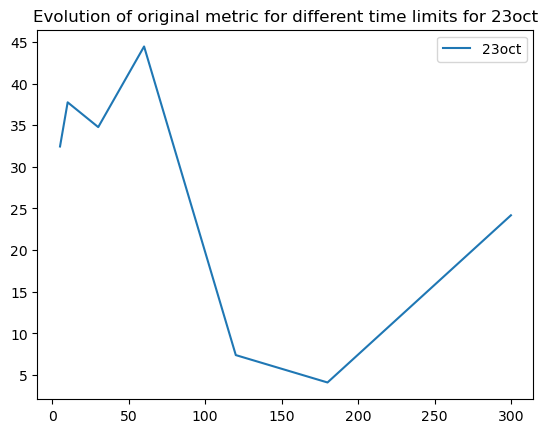

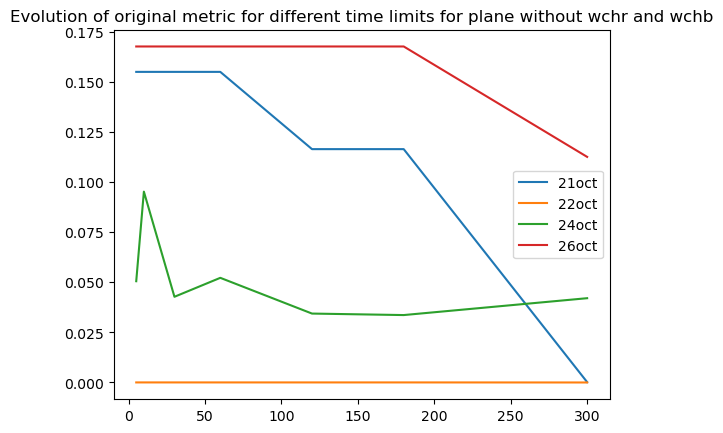

In [20]:
time_limits = [5, 10, 30, 60, 120, 180, 300]

dates = ["2nov","5nov","7nov", "21oct", "22oct", "23oct", "24oct", "26oct", "30oct"]

Y = dict()
Y_original = dict()

for date in dates:
    passengers_path = f'{PATH_FOR_INPUTS}{date}.csv'
    passengers = Passengers.compute_passengers_sets(passengers_path)

    Y[date] = []
    Y_original[date] = []
    
    best = best_metric(passengers, alpha=ALPHA)
    best_original = best_original_metric(passengers, alpha=ALPHA)

    for time in time_limits:
        results_path = f'results{time}/{date}.csv'

        plane = get_plane_from_results(results_path)
        passengers_on_seats, barycenter = get_passengers_on_seats_from_results(results_path)
        
        actual = evaluate_metric(plane, passengers, passengers_on_seats, alpha=ALPHA)

        actual_original =  evaluate_original_metric(plane, passengers, passengers_on_seats, alpha=ALPHA)

        Y[date].append(abs(best-actual)/abs(best))
        
        Y_original[date].append(abs(best_original-actual_original)/abs(best_original))

plt.figure(figsize=(10,10))
for date in dates :
    plt.plot(time_limits, Y[date], label=date)
    plt.legend()

plt.title(f"Evolution of solver metric for different time limits")
plt.show()

plt.figure(figsize=(10,10))
for date in dates :
    if date != "23oct":
        plt.plot(time_limits, Y_original[date], label=date)
        plt.legend()

plt.title(f"Evolution of original metric for different time limits")
plt.show()


date = "23oct"
plt.plot(time_limits, Y_original[date], label=date)
plt.legend()
plt.title(f"Evolution of original metric for different time limits for {date}")
plt.show()

dates_without_wch = ["21oct", "22oct", "23oct", "24oct", "26oct"]
for date in dates_without_wch :
    if date != "23oct":
        plt.plot(time_limits, Y_original[date], label=date)
        plt.legend()

plt.title(f"Evolution of original metric for different time limits for plane without wchr and wchb")
plt.show()
